In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\DOWNLOAD\diabetes_csv.csv")

In [3]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [4]:
df.columns

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000153B3D370B8>,
      dtype=object)

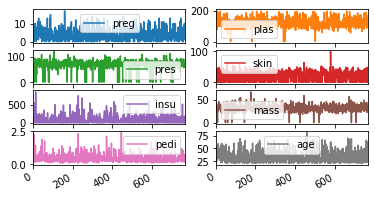

In [5]:
df.plot(subplots = True,layout = (5,2))

In [6]:
df[['class']] = df[['class']].replace(['tested_positive','tested_negative'],['1','0'])

In [7]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000153AE6A9A90>,
      dtype=object)

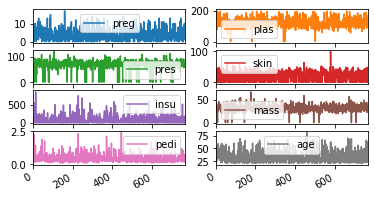

In [8]:
df.plot(subplots = True,layout = (5,2))

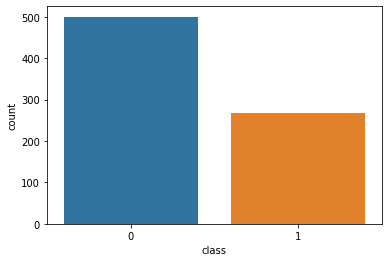

In [9]:
sns.countplot(x='class',data = df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
insu     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [11]:
# no null value

In [12]:
no_zero = ['preg','plas','pres','skin','insu','mass','pedi','age']

In [13]:
df_column = df.columns

In [14]:
df_column

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [15]:
for columns in no_zero:
    df[columns] = df[columns].replace(0,np.NAN)
    mean = int(df[columns].mean(skipna = True))
    df[columns] = df[columns].replace(np.NAN,mean)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000153B4427E48>,
      dtype=object)

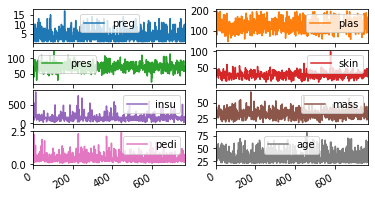

In [16]:
df.plot(subplots = True,layout = (5,2))

In [17]:
x = df.drop('class',axis = 1)

In [18]:
x

,preg,plas,pres,skin,insu,mass,pedi,age
0,6.0,148.0,72.0,35.0,155.0,33.6,0.627,50
1,1.0,85.0,66.0,29.0,155.0,26.6,0.351,31
2,8.0,183.0,64.0,29.0,155.0,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2.0,122.0,70.0,27.0,155.0,36.8,0.340,27
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1.0,126.0,60.0,29.0,155.0,30.1,0.349,47


In [20]:
y = df['class']

In [21]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: object

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = 0.2)

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
model = RandomForestClassifier(n_estimators=20,max_depth=4,random_state=1)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [64]:
prediction= model.predict(x_test)

In [65]:
accuracy_score(y_test,prediction) #RandomForest

0.7922077922077922

In [66]:


sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [67]:
classifier = KNeighborsClassifier(n_neighbors=11,p = 2,metric='euclidean')

In [68]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [69]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)


[[78 21]
 [18 37]]


In [70]:
accuracy_score(y_test,y_pred)  #KNN

0.7467532467532467

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
logreg = LogisticRegression()

In [73]:
logreg.fit(x_train,y_train)

E:\SOFTWARE\Anaonda\Newfolder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
y_pred=logreg.predict(x_test)

In [75]:
accuracy_score(y_test,y_pred)  # by using Logistic Regression

0.7597402597402597

In [80]:
len(y_pred)

154

In [82]:
len(y_test)

154